In [1]:
cd /workspace

/workspace


In [16]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir='./figures/combined_plotting/'
sc.settings.set_figure_params(dpi=100, dpi_save=300,fontsize=12, frameon=False, facecolor='white', format='png', color_map='Reds')



In [3]:
adata_SC = sc.read('data/multispecies_RATpp.h5ad')
adata_SC.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 3933 × 4242
    obs: 'sample', 'cell_types'
    var: 'gene_ids', 'Orig_VarNames'>

In [4]:
adata_SN = sc.read('data/multispecies_RAT_SN_pp.h5ad')
adata_SN.obs_names_make_unique

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 16815 × 3064
    obs: 'sample', 'cell_types'
    var: 'gene_ids', 'Orig_VarNames'>

In [5]:
adata_pl=adata_SC.concatenate(adata_SN, batch_key='tech', batch_categories=['SC','SN'])

In [6]:
adata_pl

AnnData object with n_obs × n_vars = 20748 × 992
    obs: 'sample', 'cell_types', 'tech'
    var: 'gene_ids-SC', 'Orig_VarNames-SC', 'gene_ids-SN', 'Orig_VarNames-SN'

In [7]:
set(adata_pl.obs['cell_types'])

{'Astrocytes',
 'Endothelial',
 'Fibroblast',
 'Gabaergic Neurons',
 'Glutamatergic Neurons',
 'Microglia',
 'Neurons',
 'Oligodendrocytes',
 'Other'}

In [8]:
#Compute neighborhood graph 
sc.pp.neighbors(adata_pl, n_neighbors=50, n_pcs=40)
sc.tl.leiden(adata_pl, resolution= 0.22, key_added='leiden_0.22')

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:03)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:37)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.22', the cluster labels (adata.obs, categorical) (0:00:04)


... storing 'sample' as categorical
... storing 'cell_types' as categorical
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


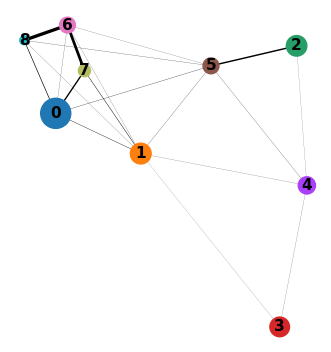

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


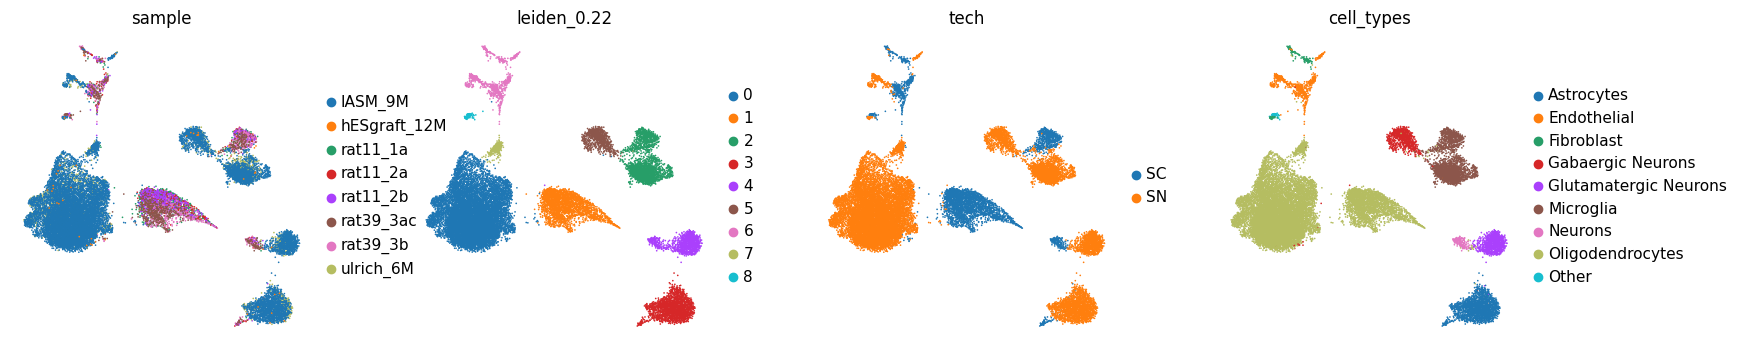

In [9]:
sc.tl.paga(adata_pl,groups='leiden_0.22')
sc.pl.paga(adata_pl,save='_Paga_cpnectivities_SCSN')
sc.tl.umap(adata_pl, init_pos='paga', n_components=3, min_dist= 0.5)
sc.pl.umap(adata_pl, color=['sample', 'leiden_0.22', 'tech', 'cell_types'], save='umaps_SCSN')

In [7]:
df0=pd.crosstab(adata_pl.obs['cell_types'],adata_pl.obs['tech']).apply(lambda r: r/r.sum(), axis=0)*100
df0

tech,SC,SN
cell_types,,
Astrocytes,1.703534,11.174547
Endothelial,10.246631,1.724651
Fibroblast,3.381643,0.196253
Gabaergic Neurons,0.000000,4.959857
Glutamatergic Neurons,0.000000,5.857865
Microglia,15.204678,10.359798
Neurons,4.373252,0.000000
Oligodendrocytes,64.022375,65.727029
Other,1.067887,0.000000


In [8]:
add=['Neurons','Gabaergic Neurons', 'Glutamatergic Neurons']
df0.loc['Neurons_all']=df0.loc[add].sum()
df0

tech,SC,SN
cell_types,,
Astrocytes,1.703534,11.174547
Endothelial,10.246631,1.724651
Fibroblast,3.381643,0.196253
Gabaergic Neurons,0.000000,4.959857
Glutamatergic Neurons,0.000000,5.857865
Microglia,15.204678,10.359798
Neurons,4.373252,0.000000
Oligodendrocytes,64.022375,65.727029
Other,1.067887,0.000000


In [9]:
df0=df0.drop(add, axis=0)
df0

tech,SC,SN
cell_types,,
Astrocytes,1.703534,11.174547
Endothelial,10.246631,1.724651
Fibroblast,3.381643,0.196253
Microglia,15.204678,10.359798
Oligodendrocytes,64.022375,65.727029
Other,1.067887,0.000000
Neurons_all,4.373252,10.817722


In [10]:
df=pd.crosstab(adata_pl.obs['sample'],adata_pl.obs['cell_types']).apply(lambda r: r/r.sum(), axis=1)*100

In [11]:
df['Neurons_all'] = df[add].sum(axis=1)
df=df.drop(add, axis=1)
df

cell_types,Astrocytes,Endothelial,Fibroblast,Microglia,Oligodendrocytes,Other,Neurons_all
sample,,,,,,,
IASM_9M,10.892445,1.600346,0.187428,9.133506,67.639850,0.000000,10.546424
hESgraft_12M,14.583333,4.166667,2.083333,12.500000,41.666667,0.000000,25.000000
rat11_1a,0.531915,5.744681,1.489362,8.404255,81.914894,0.425532,1.489362
rat11_2a,2.557201,13.189771,2.691790,13.189771,64.468371,0.672948,3.230148
rat11_2b,1.445466,12.220762,2.628121,16.425756,62.417871,1.051248,3.810775
rat39_3ac,2.719407,11.124845,4.697157,18.046972,54.140915,2.101360,7.169345
rat39_3b,1.470588,10.000000,6.029412,22.058824,52.352941,1.176471,6.911765
ulrich_6M,12.469775,2.279793,0.207254,16.200345,56.960276,0.000000,11.882556


In [12]:
df = df.reindex(['rat11_1a','rat11_2a','rat11_2b', 'rat39_3ac' , 'rat39_3b', 'ulrich_6M','IASM_9M','hESgraft_12M'])
df

cell_types,Astrocytes,Endothelial,Fibroblast,Microglia,Oligodendrocytes,Other,Neurons_all
sample,,,,,,,
rat11_1a,0.531915,5.744681,1.489362,8.404255,81.914894,0.425532,1.489362
rat11_2a,2.557201,13.189771,2.691790,13.189771,64.468371,0.672948,3.230148
rat11_2b,1.445466,12.220762,2.628121,16.425756,62.417871,1.051248,3.810775
rat39_3ac,2.719407,11.124845,4.697157,18.046972,54.140915,2.101360,7.169345
rat39_3b,1.470588,10.000000,6.029412,22.058824,52.352941,1.176471,6.911765
ulrich_6M,12.469775,2.279793,0.207254,16.200345,56.960276,0.000000,11.882556
IASM_9M,10.892445,1.600346,0.187428,9.133506,67.639850,0.000000,10.546424
hESgraft_12M,14.583333,4.166667,2.083333,12.500000,41.666667,0.000000,25.000000


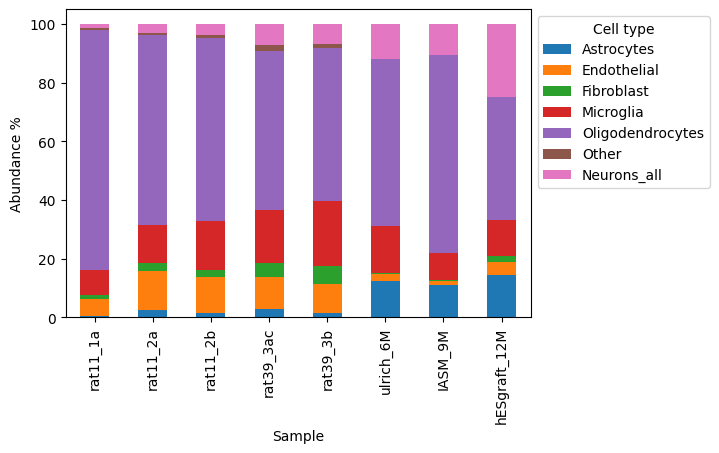

In [17]:
with plt.style.context('default'):
    ax = df.plot(kind='bar', stacked=True, figsize=(6, 4))
    ax.set_ylabel('Abundance %')
    ax.set_xlabel('Sample')
    plt.legend(title='Cell type', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.savefig('./figures/combined_plotting/Cell_type_stacked_sample.png')  # if needed
    plt.show()

In [18]:
df=pd.crosstab(adata_pl.obs['tech'],adata_pl.obs['cell_types']).apply(lambda r: r/r.sum(), axis=1)*100

In [19]:
df['Neurons_all']=df[add].sum(axis=1)
df=df.drop(add, axis=1)
df

cell_types,Astrocytes,Endothelial,Fibroblast,Microglia,Oligodendrocytes,Other,Neurons_all
tech,,,,,,,
SC,1.703534,10.246631,3.381643,15.204678,64.022375,1.067887,4.373252
SN,11.174547,1.724651,0.196253,10.359798,65.727029,0.000000,10.817722


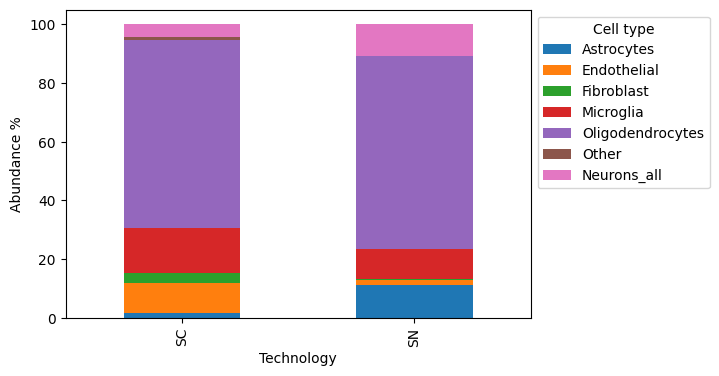

In [20]:
with plt.style.context('default'):
    ax = df.plot(kind='bar', stacked=True, figsize=(6, 4))
    ax.set_ylabel('Abundance %')
    ax.set_xlabel('Technology')
    plt.legend(title='Cell type', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.savefig('./figures/combined_plotting/Tech_stacked.png')  # if needed
    plt.show()